In [ ]:
# Used for visualization of plots
import matplotlib.pyplot as plt

# Used for dealing with Data Structures
import numpy as np

# Used to visualize tables 
import pandas as pd

# Algorithm for K Means Clustering
from sklearn.cluster import KMeans

# Algorithm for PCA
from sklearn.decomposition import PCA

#KMeans#

In [ ]:
df = pd.read_csv('i.csv')

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# Remove the Target column. When we cluster, we only want to use its features
df.pop('Target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# We just want 2 Dimensions, so we can plot it on a 2d data
two_dim = df.iloc[:,:2]

In [ ]:
two_dim.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
two_dim_data = two_dim.values
print(two_dim_data.shape)

(150, 2)


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(two_dim_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# The KMeans algorithm has learnt 3 different groupings. Each example will be assigned to one group
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# Coordinates of the 3 centroids
kmeans.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

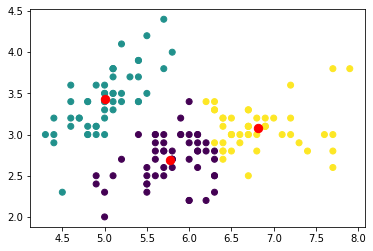

In [ ]:
plt.scatter(x=two_dim_data[:,0], y=two_dim_data[:,1], c=kmeans.labels_)
plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], s=70, c='red')

In [ ]:
def cluster(n_clusters, data):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(data)
  plt.scatter(x=data[:,0], y=data[:,1], c=kmeans.labels_)
  plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], s=70, c='red')

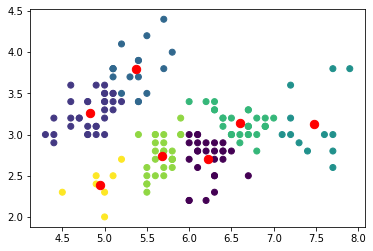

In [ ]:
cluster(7, two_dim_data)

In [ ]:
# Get the intertia of your KMeans. The smaller the number, the better
kmeans.inertia_

37.05070212765958

In [ ]:
# List to append all the inertias to 
inertia_list = []

# Elbow Method
for n_cluster in range(1, 8):
  kmeans = KMeans(n_clusters=n_cluster)
  kmeans.fit(two_dim_data)
  inertia_list.append(kmeans.inertia_)

In [ ]:
inertia_list

[130.47526666666667,
 58.20409278906671,
 37.05070212765958,
 28.034982153246226,
 20.957355867306912,
 17.363261904761906,
 14.809344322344323]

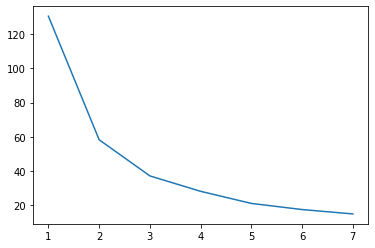

In [ ]:
# After the 3rd cluster, the inertia drastically reduced in change
# Of couse, this is subjective. But we don't want too many clusters as it may cause real data clusters to be separated
plt.plot(range(1,8), inertia_list)

# PCA#

In [ ]:
df = pd.read_csv('i.csv')

In [ ]:
# Just now, we worked with 2D data. Now, we want to work fully with the 4D data
df.pop('Target')
data = df.values

In [ ]:
# Instead of (150,2) which was 2 Dimensional, we have (150,4) which is 4 dimensional
data.shape

(150, 4)

In [ ]:
# We want to reduce our 4D data to 2D so we can visualize it on a plot
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

In [ ]:
# You guessed it! You'll get shape (150,2) once you've reduced it to 2D
reduced_data.shape

(150, 2)

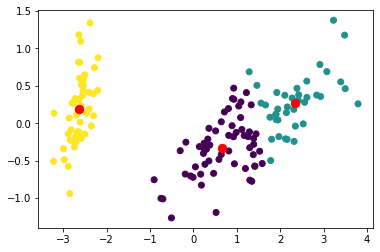

In [ ]:
# We are now able to produce a 2D cluster, using all the original 4 Dimensions. Cool :)
cluster(3, reduced_data)